# **MW14** Problem

In [1]:
%pip install pymoo --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.1/249.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 6.5 MB/s eta 0:00:00


In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pymoo.core.problem import Problem
from pymoo.problems import get_problem
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter
from pymoo.optimize import minimize
from pymoo.problems import get_problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize

from pymoo.indicators.hv import Hypervolume
import numpy as np
import random


### Pruebas Plot

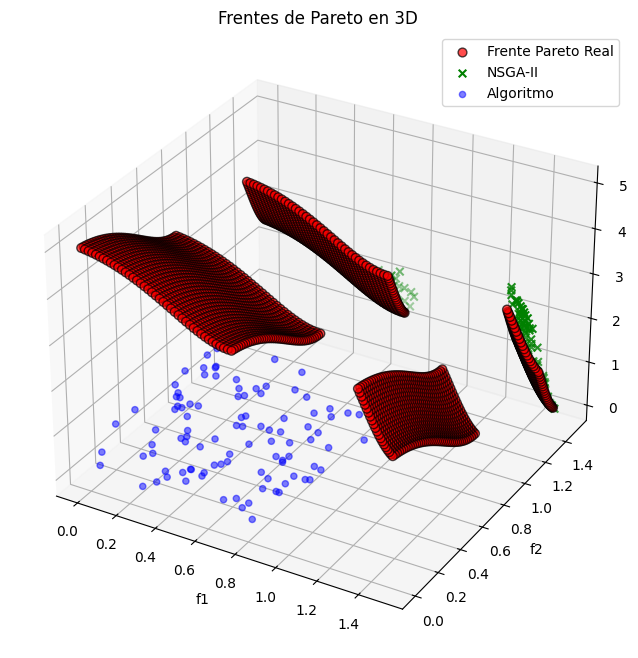

In [3]:
# Configuración del problema y algoritmo
problem = get_problem("mw14")  # Problema MW14
algorithm = NSGA2(pop_size=100)  # Algoritmo NSGA-II
nsga2_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)

# Genera un frente de Pareto aleatorio (3 objetivos)
def random_pareto_front(num_points=100):
    f1 = np.random.uniform(0, 1, num_points)
    f2 = np.random.uniform(0, 1, num_points)
    f3 = np.random.uniform(0, 1, num_points)
    return np.column_stack([f1, f2, f3])

# Función para graficar los frentes de Pareto en 3D
def plot_pareto_3d_2(problem, nsga2_pareto, alg_pareto):
    nsga2_f1, nsga2_f2, nsga2_f3 = nsga2_pareto.F[:, 0], nsga2_pareto.F[:, 1], nsga2_pareto.F[:, 2]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Frente de Pareto real de MW14 (rojo, puntos huecos)
    real_pareto = problem.pareto_front()
    ax.scatter(real_pareto[:, 0], real_pareto[:, 1], real_pareto[:, 2],
               color="red", label="Frente Pareto Real", alpha=0.7, edgecolor="black", s=40)

    # Frente de Pareto de NSGA-II (verde, puntos sólidos)
    ax.scatter(nsga2_f1, nsga2_f2, nsga2_f3, color="green", label="NSGA-II", s=30, marker='x')

    # Frente de Pareto del algoritmo implementado (azul, puntos con opacidad)
    ax.scatter(alg_pareto[:, 0], alg_pareto[:, 1], alg_pareto[:, 2],
               color="blue", label="Algoritmo", alpha=0.5, marker='o')

    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frentes de Pareto en 3D")
    ax.legend()
    plt.show()

alg_pareto = random_pareto_front()
plot_pareto_3d_2(problem, nsga2_pareto, alg_pareto)

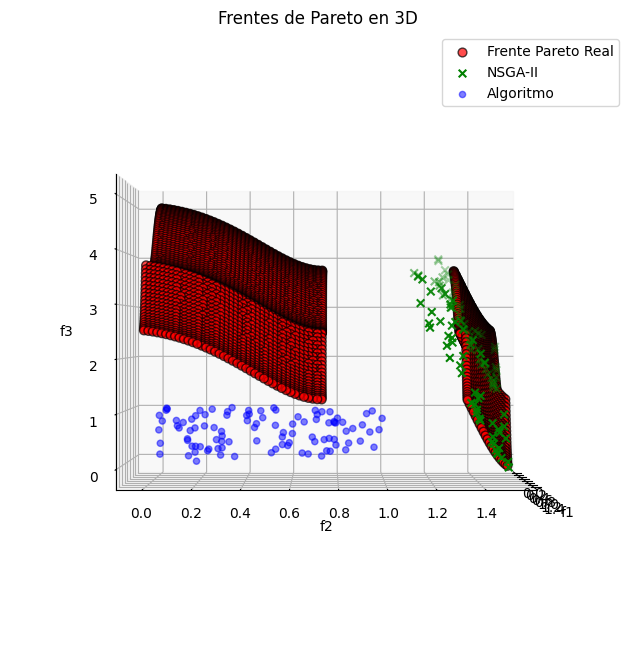

In [4]:
problem = get_problem("mw14")  # Problema MW14
algorithm = NSGA2(pop_size=100)  # Algoritmo NSGA-II
nsga2_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)

def random_pareto_front(num_points=100):
    f1 = np.random.uniform(0, 1, num_points)
    f2 = np.random.uniform(0, 1, num_points)
    f3 = np.random.uniform(0, 1, num_points)
    return np.column_stack([f1, f2, f3])

def plot_pareto_3d(problem, nsga2_pareto, alg_pareto):
    nsga2_f1, nsga2_f2, nsga2_f3 = nsga2_pareto.F[:, 0], nsga2_pareto.F[:, 1], nsga2_pareto.F[:, 2]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    real_pareto = problem.pareto_front()
    ax.scatter(real_pareto[:, 0], real_pareto[:, 1], real_pareto[:, 2],
               color="red", label="Frente Pareto Real", alpha=0.7, edgecolor="black", s=40)

    ax.scatter(nsga2_f1, nsga2_f2, nsga2_f3, color="green", label="NSGA-II", s=30, marker='x')

    ax.scatter(alg_pareto[:, 0], alg_pareto[:, 1], alg_pareto[:, 2],
               color="blue", label="Algoritmo", alpha=0.5, marker='o')

    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frentes de Pareto en 3D")

    ax.view_init(elev=0, azim=0)

    ax.legend()
    plt.show()

alg_pareto = random_pareto_front()
plot_pareto_3d(problem, nsga2_pareto, alg_pareto)

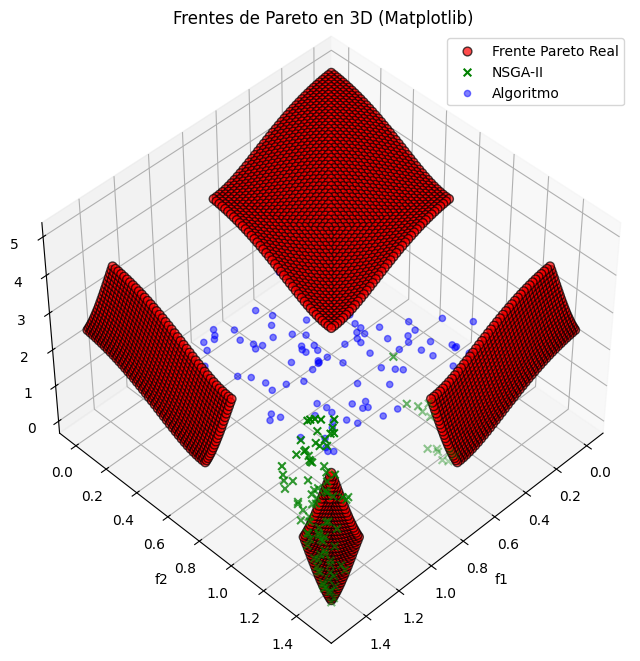

In [5]:
problem = get_problem("mw14")  # Problema MW14
algorithm = NSGA2(pop_size=100)  # Algoritmo NSGA-II
nsga2_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)

def random_pareto_front(num_points=100):
    f1 = np.random.uniform(0, 1, num_points)
    f2 = np.random.uniform(0, 1, num_points)
    f3 = np.random.uniform(0, 1, num_points)
    return np.column_stack([f1, f2, f3])

def plot_pareto_3d(problem, nsga2_pareto, alg_pareto):
    nsga2_f1, nsga2_f2, nsga2_f3 = nsga2_pareto.F[:, 0], nsga2_pareto.F[:, 1], nsga2_pareto.F[:, 2]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    real_pareto = problem.pareto_front()
    ax.scatter(real_pareto[:, 0], real_pareto[:, 1], real_pareto[:, 2],
               color="red", label="Frente Pareto Real", alpha=0.7, edgecolor="black", s=40)

    ax.scatter(nsga2_f1, nsga2_f2, nsga2_f3, color="green", label="NSGA-II", s=30, marker='x')

    ax.scatter(alg_pareto[:, 0], alg_pareto[:, 1], alg_pareto[:, 2],
               color="blue", label="Algoritmo", alpha=0.5, marker='o')

    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frentes de Pareto en 3D (Matplotlib)")
    ax.view_init(elev=45, azim=45)
    ax.legend()
    plt.show()


def plot_pareto_with_pymoo():
    ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
    problem = get_problem("mw14").pareto_front()

    Scatter(angle=(45, 45)).add(problem, color="red").show()

alg_pareto = random_pareto_front()
plot_pareto_3d(problem, nsga2_pareto, alg_pareto)

# Graficar usando pymoo (Scatter)
#plot_pareto_with_pymoo()

------
------
------

## **Algoritmo Diferencial**


In [6]:
def calculate_metrics(front, ref_point):
    """ Calcula las métricas: hipervolumen, dispersión (SPR) y espaciado (SPA). """

    # Hipervolumen (HV)
    # Asegúrate de que `ref_point` esté ajustado para el rango de los objetivos de MW14
    metricHV = Hypervolume(ref_point)
    hv = metricHV.do(front)

    # Dispersión (SPR): Diagonal de la hipercaja que contiene el frente
    min_values = np.min(front, axis=0)
    max_values = np.max(front, axis=0)
    spr = np.linalg.norm(max_values - min_values)

    # Espaciado (SPA): Distancia promedio entre puntos del frente
    d = np.linalg.norm(front[:, None, :] - front[None, :, :], axis=-1)
    spa = np.mean(np.min(d + np.diag(np.inf * np.ones(len(d))), axis=1))

    return hv, spr, spa

def fitness_mw14(individual: np.ndarray, problem) -> np.ndarray:

    individual_reshaped = individual[np.newaxis, :]
    out = {}
    problem._evaluate(individual_reshaped, out)
    return out["F"][0]

def dominance_rank(individual, population):
    """ Calcula el rango de dominancia de Pareto de un individuo en la población.
        - Menor rango significa que está en un frente de Pareto más alto (más óptimo) """
    dominated_count = 0
    for other in population:
        if dominates(individual, other):
            dominated_count += 1

    return dominated_count


def dominates(individual_1, individual_2, fitness_function, problem):
    f1 = fitness_function(individual_1, problem)
    f2 = fitness_function(individual_2, problem)
    return np.all(f1 <= f2) and np.any(f1 < f2)


def get_pareto_front(population, fitness_function, problem):
    """ Obtiene el frente de Pareto de una población.
        Returns:
            list: Los individuos que forman parte del frente de Pareto"""
    pareto_front = []
    for ind in population:
        is_dominated = False
        for other in population:
            if dominates(other, ind, fitness_function, problem):
                is_dominated = True
                break
        if not is_dominated:
            pareto_front.append(ind)
    return pareto_front


def create_population(N, problem):
    """
    Crea una población inicial de N individuos en el problema MW14.
    El espacio de búsqueda de las variables es [0, 1.5].
    """
    lower_bounds, upper_bounds = problem.bounds()
    population = np.random.uniform(lower_bounds, upper_bounds, (N, problem.n_var))
    return population

In [7]:
def calculate_F(F_initial, F_mode, t, T):
    """ Calcula el valor de F dinámicamente según el modo seleccionado. """
    if F_mode == 1:
        return F_initial * (1 - t / T)
    elif F_mode == 2:
        return F_initial * np.exp(-t / T)
    elif F_mode == 3:
        return F_initial * np.sin(t / T)
    elif F_mode == 4:
        return F_initial * np.cos(t / T)
    elif F_mode == 5:
        return F_initial * np.tan(t / T)
    elif F_mode == 6:
        return F_initial * np.log(t / T) if t > 0 else F_initial
    elif F_mode == 7:
        return F_initial * (np.sin(t / T) + np.cos(t / T))
    else:  # Modo 0 o cualquier valor no reconocido
        return F_initial

In [8]:
def differential_evolution_step(pop, fitness_function, problem, fitness_cache, F_initial, CR, F_mode, t=0, T=10000):
    """
    Un paso del algoritmo diferencial DE/rand/1/bin adaptado para usar el problema y el fitness.
    Utiliza una caché para evitar recalcular fitness ya conocidos.

    Args:
        pop (list): La población actual.
        fitness_function (callable): La función para calcular el fitness.
        problem: El problema de pymoo.
        fitness_cache (dict): Caché de valores de fitness.
        F_initial (float): Escalamiento inicial de la diferencia.
        CR (float): Ratio de cruce.
        F_mode (int): Modo de cálculo del escalamiento.
        t (int): Iteración actual.
        T (int): Número total de iteraciones.
    """
    NP = len(pop)
    new_pop = []

    # F dependiendo del modo seleccionado
    F = calculate_F(F_initial, F_mode, t, T)

    lower_bounds, upper_bounds = problem.bounds()

    for i in range(NP):
        Xj1, Xj2, Xj3 = random.sample([ind for ind in pop if not np.array_equal(ind, pop[i])], 3)
        child = [Xj1[k] + F * (Xj2[k] - Xj3[k]) for k in range(len(Xj1))]

        # limitan los valores del hijo dentro de los límites del problema
        child = np.clip(child, lower_bounds, upper_bounds)

        # Cruce con el individuo original
        for j in range(len(child)):
            if random.random() > CR:
                child[j] = pop[i][j]

        child = np.clip(child, lower_bounds, upper_bounds)
        # Comprobaciones caché
        child_tuple = tuple(child)
        if child_tuple not in fitness_cache:
            fitness_cache[child_tuple] = fitness_function(np.array(child), problem)

        parent_tuple = tuple(pop[i])
        if parent_tuple not in fitness_cache:
            fitness_cache[parent_tuple] = fitness_function(np.array(pop[i]), problem)

        # Sustituir al padre si el hijo lo domina
        fitness_child = fitness_cache[child_tuple]
        fitness_parent = fitness_cache[parent_tuple]

        if dominates(np.array(child), np.array(pop[i]), fitness_function, problem):
            pop[i] = child  # Reemplazo del padre

        new_pop.append(pop[i])

    return pop, fitness_cache

In [9]:
def evolve_with_DE(pop, fitness, problem, F, CR, neval, trace, F_mode):
    """
    Evoluciona la población usando el algoritmo diferencial DE/rand/1/bin.
    Utiliza una caché para evitar recalcular fitness.

    Args:
        pop (list): Población inicial (lista de np.ndarray).
        fitness_function (callable): Función de fitness que acepta un individuo y el problema.
        problem: Problema de optimización de pymoo.
        F (float): Escalamiento de la diferencia en DE.
        CR (float): Ratio de cruce.
        neval (int): Número máximo de evaluaciones de fitness.
        trace (int): Intervalo de trazado (impresión de progreso).
        F_mode (int): Modo de cálculo del factor de escalamiento.
    """
    evals = 0  # Contador de evaluaciones
    fitness_cache = {}  # Caché para almacenar fitness calculados

    # Evalua la población inicial y llenar la caché
    for ind in pop:
        ind_tuple = tuple(ind)
        if ind_tuple not in fitness_cache:
            fitness_cache[ind_tuple] = fitness(np.array(ind), problem)
            evals += 1

    t = 0
    fitness_trace = []
    while evals < neval:
        # Un paso del algoritmo diferencial
        pop, fitness_cache = differential_evolution_step(
            pop, fitness, problem, fitness_cache, F, CR, F_mode, t, neval
        )

        # Se actualizan las evaluaciones con los nuevos fitness calculados
        new_eval_fitness = len(fitness_cache) - evals
        evals += new_eval_fitness

        # Guardar los fitness actuales para la traza
        current_fitness_values = [fitness(ind, problem) for ind in pop]
        fitness_trace.append(current_fitness_values)

        #if trace and t % trace == 0:
        #    print(f"Iteración {t}: Evaluaciones = {evals}, Individuos en población = {len(pop)}")

        #t += 1

        if evals >= neval:
            break

    return pop, evals, fitness_trace  # Retornar también la traza de fitness

### **Evaluación** Individual

In [10]:
# Función para graficar los frentes de Pareto en 3D (matplotlib)
def plot_pareto_3d(problem, nsga2_pareto, pop):
    nsga2_f1, nsga2_f2, nsga2_f3 = nsga2_pareto.F[:, 0], nsga2_pareto.F[:, 1], nsga2_pareto.F[:, 2]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Frente de Pareto real de MW14 (rojo, puntos huecos)
    real_pareto = problem.pareto_front()
    ax.scatter(real_pareto[:, 0], real_pareto[:, 1], real_pareto[:, 2],
               color="red", label="Frente Pareto Real", alpha=0.3, edgecolor="black", s=40)

    # Frente de Pareto de NSGA-II (verde, puntos sólidos)
    ax.scatter(nsga2_f1, nsga2_f2, nsga2_f3, color="green", label="NSGA-II", s=30, marker='x')

    # Frente de Pareto del algoritmo implementado (azul, puntos con opacidad)
    f1, f2, f3 = zip(*[fitness_mw14(ind, problem) for ind in pop])
    ax.scatter(f1, f2, f3, color="blue", label="Algoritmo", alpha=0.5, marker='o')

    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frentes de Pareto en 3D")
    ax.view_init(elev=45, azim=45)  # Ajustar vista 3D
    ax.legend()
    plt.show()

    print("")

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(real_pareto[:, 0], real_pareto[:, 1], real_pareto[:, 2], color="red", label="Frente Pareto Real", alpha=0.3, edgecolor="black", s=40)
    ax.scatter(nsga2_f1, nsga2_f2, nsga2_f3, color="green", label="NSGA-II", s=30, marker='x')
    ax.scatter(f1, f2, f3, color="blue", label="Algoritmo", alpha=0.5, marker='o')

    ax.set_xlabel("f1")
    ax.set_ylabel("f2")
    ax.set_zlabel("f3")
    ax.set_title("Frentes de Pareto en 3D")
    ax.legend()
    plt.show()

- Evaluaciones: 10150
- Tamaño del Frente de Pareto: 52

                 Hipervolumen  Dispersión (SPR)  Espaciado (SPA)
Mejor Solución      5.394945         12.034896         0.359479
NSGA2 a Batir       1.463435          3.987091         0.071381


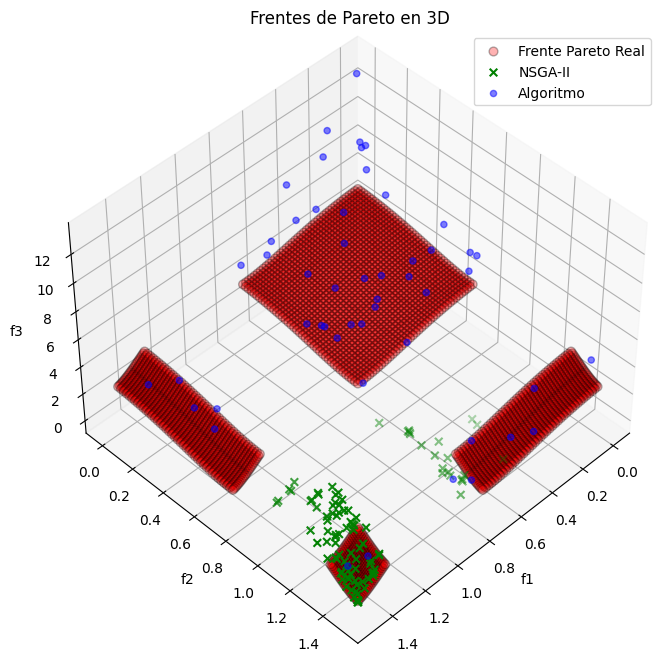

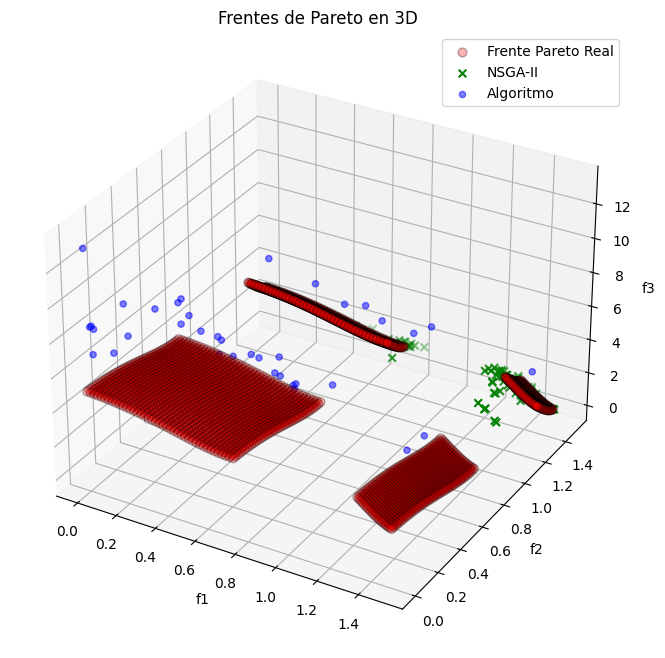

In [ ]:
problem = get_problem("mw14")
algorithm = NSGA2(pop_size=100)
ref_point = np.array([1.5, 1.5, 7])

if nsga2_pareto is None:
    nsga2_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)

population = create_population(200, problem)

###############################
##### Llamada Algoritmo DE ####
###############################
result_population, evals, fitness_trace = evolve_with_DE(population, fitness=fitness_mw14, problem=problem, F=0.1, CR=0.3, neval=10000, trace=100, F_mode=0)

# Obtiene el frente de Pareto del algoritmo DE
pareto_front = get_pareto_front(result_population, fitness_mw14, problem)
pareto_objectives = np.array([fitness_mw14(ind, problem) for ind in pareto_front])

print("- Evaluaciones:", evals)
print("- Tamaño del Frente de Pareto:", len(pareto_front))

####################
##### Métricas #####
####################
hv, spr, spa = calculate_metrics(pareto_objectives, ref_point)
hv_obj, spr_obj, spa_obj = calculate_metrics(nsga2_pareto.F, ref_point)

data = {'Hipervolumen': [hv, hv_obj], 'Dispersión (SPR)': [spr, spr_obj], 'Espaciado (SPA)': [spa, spa_obj]}
df = pd.DataFrame(data, index=['Mejor Solución', 'NSGA2 a Batir'])
print(f"\n {df}")

####################
##### Graficas #####
####################
plot_pareto_3d(problem, nsga2_pareto, pareto_front)


## **Múltiples Experimentos**

In [11]:
'''
    Ejecuta múltiples experimentos dado un problema y un algoritmo de optimización multi-objetivo. Se le pasa el punto de referencia del hipervolumen,
    el número de experimentos y el número de generaciones. El criterio de selección del mejor frente de pareto se puede modificar. Por defecto, se hace según
    el hipervolumen.

    @return
        - best_individual_ frente_pareto [[distance1, time1], [distance2, time2], ...],
        - metrics_summary: resumen de metricas de los 10 experimentos
'''
def multiple_experiments_with_metrics(problem, fitness_function, ref_point, num_experiments=2,
                                      pop_size=200, F=0.1, CR=0.3, neval=10000, trace=100, F_mode=1):

    best_pareto = None
    best_pareto_objectives = None

    best_hypervolume = -float('inf')

    metrics_summary = []

    for i in range(num_experiments):

        population = create_population(pop_size, problem)
        # Algoritmo Diferencial
        result_population, evals, fitness_trace = evolve_with_DE(population, fitness=fitness_function, problem=problem, F=F, CR=CR, neval=neval, trace=trace, F_mode=0)

        pareto_front = get_pareto_front(result_population, fitness_function, problem)
        pareto_objectives = np.array([fitness_function(ind, problem) for ind in pareto_front])


        if pareto_front is None or len(pareto_front) == 0:
            continue

        # Métricas del pareto
        hv, spr, spa = calculate_metrics(pareto_objectives, ref_point)
        metrics_summary.append((hv, spr, spa))

        if F_mode == 0: print(f"Experimento {i+1} | Mode: {F_mode} | Evals: {evals}: Hipervolumen: {hv:.4f}, Dispersión (SPR): {spr:.4f}, Espaciado (SPA): {spa:.4f}")

        # Comparacion mediante el hipervolumen
        if hv > best_hypervolume:
            best_hypervolume = hv
            best_pareto = pareto_front
            best_pareto_objectives = pareto_objectives

    # Promedios y desviaciones estándar de las métricas
    metrics_summary = np.array(metrics_summary)
    mean_metrics = np.mean(metrics_summary, axis=0)
    std_metrics = np.std(metrics_summary, axis=0)

    print(f"\n--- Resumen de Métricas con F_mode: [{F_mode}] ---")
    print(f"Promedio de Hipervolumen: {mean_metrics[0]:.4f} ± {std_metrics[0]:.4f}")
    print(f"Promedio de Dispersión (SPR): {mean_metrics[1]:.4f} ± {std_metrics[1]:.4f}")
    print(f"Promedio de Espaciado (SPA): {mean_metrics[2]:.4f} ± {std_metrics[2]:.4f}")

    return best_pareto, best_pareto_objectives, metrics_summary

Experimento 1 | Mode: 0 | Evals: 10148: Hipervolumen: 5.8308, Dispersión (SPR): 5.1698, Espaciado (SPA): 0.2737
Experimento 2 | Mode: 0 | Evals: 10147: Hipervolumen: 6.3081, Dispersión (SPR): 10.4588, Espaciado (SPA): 0.2563
Experimento 3 | Mode: 0 | Evals: 10150: Hipervolumen: 5.0761, Dispersión (SPR): 10.6831, Espaciado (SPA): 0.3035
Experimento 4 | Mode: 0 | Evals: 10163: Hipervolumen: 5.5505, Dispersión (SPR): 9.1428, Espaciado (SPA): 0.3043
Experimento 5 | Mode: 0 | Evals: 10158: Hipervolumen: 5.3678, Dispersión (SPR): 8.8617, Espaciado (SPA): 0.3221
Experimento 6 | Mode: 0 | Evals: 10159: Hipervolumen: 5.8354, Dispersión (SPR): 6.2443, Espaciado (SPA): 0.3481
Experimento 7 | Mode: 0 | Evals: 10156: Hipervolumen: 4.8330, Dispersión (SPR): 8.0816, Espaciado (SPA): 0.3627
Experimento 8 | Mode: 0 | Evals: 10150: Hipervolumen: 5.5442, Dispersión (SPR): 10.4462, Espaciado (SPA): 0.3472
Experimento 9 | Mode: 0 | Evals: 10150: Hipervolumen: 6.1906, Dispersión (SPR): 4.8977, Espaciado (SP

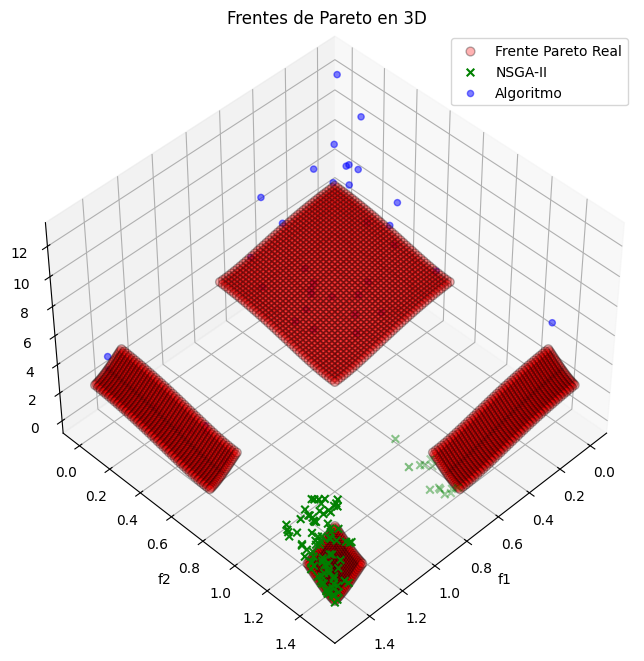

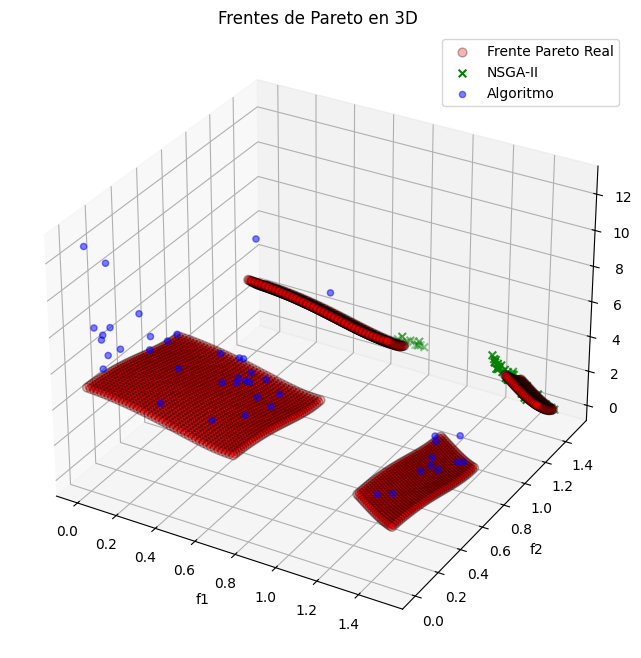

In [13]:
### Inicializar el problema ZDT1 y obtener pareto de NSGA2 para comparar ###
problem = get_problem("mw14")
algorithm = NSGA2(pop_size=100)
ref_point = np.array([1.5, 1.5, 7.0])

if nsga2_pareto is None: nsga2_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)

best_pareto, best_pareto_objetives, metrics_summary = multiple_experiments_with_metrics(problem, fitness_mw14, ref_point, num_experiments=10, F_mode=0)

####################
### Métricas ###
####################
hv, spr, spa = calculate_metrics(best_pareto_objetives, ref_point)
hv_obj, spr_obj, spa_obj = calculate_metrics(nsga2_pareto.F, ref_point)

data = {'Hipervolumen': [hv, hv_obj], 'Dispersión (SPR)': [spr, spr_obj], 'Espaciado (SPA)': [spa, spa_obj]}

df = pd.DataFrame(data, index=['Mejor Solución', 'NSGA2 a Batir'])
print(f"\n {df}")


####################
##### Graficas #####
####################
plot_pareto_3d(problem, nsga2_pareto, best_pareto)
plot_pareto_with_pymoo()

### **Evaluación múltiple *F* dinámicos**

In [ ]:
def normalize_metrics(df):
    # Normalización: Min-Max scaling
    df['Hipervolumen_norm'] = (df['Hipervolumen'] - df['Hipervolumen'].min()) / (df['Hipervolumen'].max() - df['Hipervolumen'].min())
    df['Dispersión_norm'] = (df['Dispersión (SPR)'] - df['Dispersión (SPR)'].min()) / (df['Dispersión (SPR)'].max() - df['Dispersión (SPR)'].min())
    df['Espaciado_norm'] = (df['Espaciado (SPA)'] - df['Espaciado (SPA)'].min()) / (df['Espaciado (SPA)'].max() - df['Espaciado (SPA)'].min())

    return df

# Combina las métricas para obtener una puntuación compuesta
def compute_compounded_score(df):
    df['score'] = df['Hipervolumen_norm'] - df['Dispersión_norm'] - df['Espaciado_norm']
    return df

Experimento 1 | Mode: 0 | Evals: 10047: Hipervolumen: 5.6809, Dispersión (SPR): 8.5945, Espaciado (SPA): 0.3267
Experimento 2 | Mode: 0 | Evals: 10040: Hipervolumen: 4.8727, Dispersión (SPR): 7.3660, Espaciado (SPA): 0.3368
Experimento 3 | Mode: 0 | Evals: 10014: Hipervolumen: 4.6805, Dispersión (SPR): 10.3536, Espaciado (SPA): 0.5762
Experimento 4 | Mode: 0 | Evals: 10015: Hipervolumen: 5.0872, Dispersión (SPR): 9.4713, Espaciado (SPA): 0.5035
Experimento 5 | Mode: 0 | Evals: 10030: Hipervolumen: 5.2778, Dispersión (SPR): 9.5232, Espaciado (SPA): 0.2909
Experimento 6 | Mode: 0 | Evals: 10046: Hipervolumen: 5.0098, Dispersión (SPR): 6.4377, Espaciado (SPA): 0.3624
Experimento 7 | Mode: 0 | Evals: 10080: Hipervolumen: 4.9632, Dispersión (SPR): 8.6393, Espaciado (SPA): 0.3393
Experimento 8 | Mode: 0 | Evals: 10088: Hipervolumen: 4.9293, Dispersión (SPR): 6.8678, Espaciado (SPA): 0.3441
Experimento 9 | Mode: 0 | Evals: 10030: Hipervolumen: 5.4929, Dispersión (SPR): 6.6003, Espaciado (SPA)

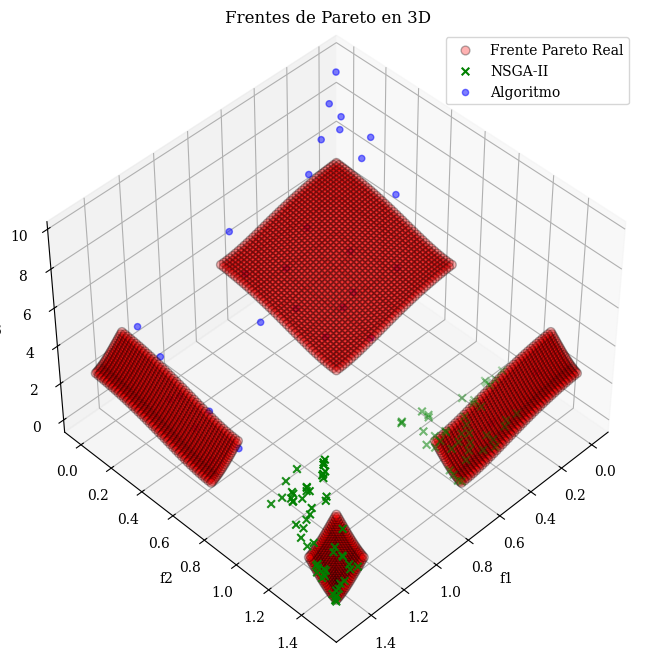

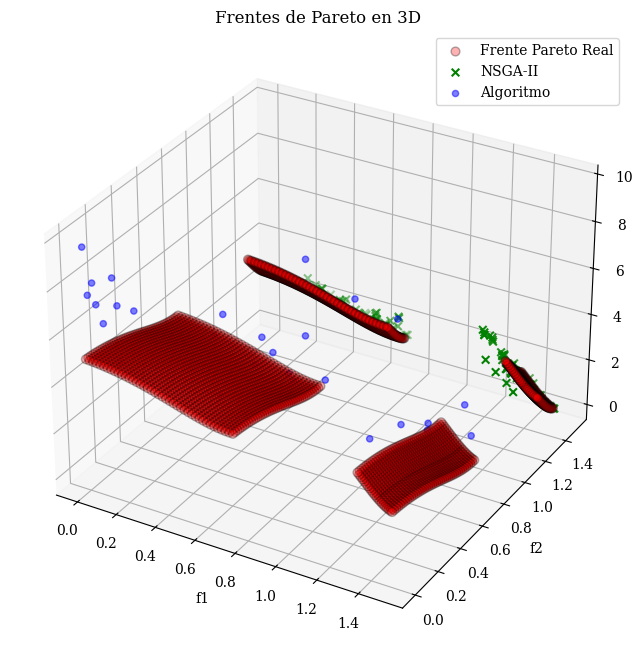

In [ ]:
problem = get_problem("mw14")
algorithm = NSGA2(pop_size=100)
ref_point = np.array([1.5, 1.5, 7.0])

if nsga2_pareto is None: nsga2_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)


df_F_modes = pd.DataFrame(columns=['Hipervolumen', 'Dispersión (SPR)', 'Espaciado (SPA)'])
pareto_fronts = {}

for i in range(0,8):
    best_pareto, best_pareto_objetives, metrics_summary = multiple_experiments_with_metrics(problem, fitness_mw14, ref_point, num_experiments=10, F_mode=i)
    pareto_fronts[f'F_mode_{i}'] = best_pareto

    print(f"F_mode: {i}")
    ####################
    ### Métricas ###
    ####################
    hv, spr, spa = calculate_metrics(best_pareto_objetives, ref_point)

    df_F_modes.loc[f'F_mode_{i}'] = [hv, spr, spa]
    print("\n")

hv_obj, spr_obj, spa_obj = calculate_metrics(nsga2_pareto.F, ref_point)
df_F_modes.loc[f'NSGA2'] = [hv_obj, spr_obj, spa_obj]

print(df_F_modes)

# Normaliza las métricas
df_F_modes = normalize_metrics(df_F_modes)
# Combina las métricas para obtener una puntuación compuesta
df_F_modes = compute_compounded_score(df_F_modes)
# Encuentra el mejor F_mode basado en la puntuación compuesta
best_F_mode = df_F_modes.drop('NSGA2')['score'].idxmax()

print("\nMejor F_mode:", best_F_mode)


####################
### Grafica ###
####################

best_F_mode = df_F_modes.drop('NSGA2')['Hipervolumen'].idxmax()
plot_pareto_3d(problem, nsga2_pareto, pareto_fronts[best_F_mode])

## Algoritmo AGEMOEA

In [ ]:
import numpy as np
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.algorithms.moo.age import AGEMOEA


C:\Users\anny0\AppData\Roaming\Python\Python310\site-packages\pymoo\algorithms\moo\age.py:212: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
C:\Users\anny0\AppData\Roaming\Python\Python310\site-packages\pymoo\algorithms\moo\age.py:222: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit(fastmath=True)
C:\Users\anny0\AppData\Roaming\Python\Pyth

Experimento 1 | Mode: 0 | Evals: 10145: Hipervolumen: 6.3938, Dispersión (SPR): 7.5594, Espaciado (SPA): 0.2989
Experimento 2 | Mode: 0 | Evals: 10154: Hipervolumen: 5.9872, Dispersión (SPR): 10.4505, Espaciado (SPA): 0.3288
Experimento 3 | Mode: 0 | Evals: 10158: Hipervolumen: 5.8246, Dispersión (SPR): 11.8469, Espaciado (SPA): 0.3307
Experimento 4 | Mode: 0 | Evals: 10152: Hipervolumen: 5.2624, Dispersión (SPR): 13.6527, Espaciado (SPA): 0.4416
Experimento 5 | Mode: 0 | Evals: 10153: Hipervolumen: 4.6338, Dispersión (SPR): 9.9452, Espaciado (SPA): 0.3453
Experimento 6 | Mode: 0 | Evals: 10154: Hipervolumen: 5.3178, Dispersión (SPR): 9.3919, Espaciado (SPA): 0.2834
Experimento 7 | Mode: 0 | Evals: 10166: Hipervolumen: 5.3549, Dispersión (SPR): 9.7810, Espaciado (SPA): 0.2764
Experimento 8 | Mode: 0 | Evals: 10151: Hipervolumen: 5.7765, Dispersión (SPR): 8.1156, Espaciado (SPA): 0.2879
Experimento 9 | Mode: 0 | Evals: 10141: Hipervolumen: 5.0108, Dispersión (SPR): 7.6345, Espaciado (SP

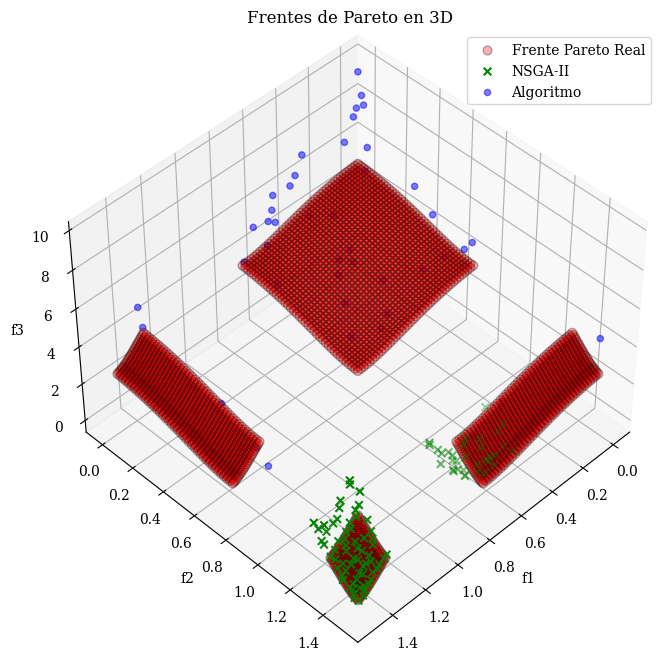

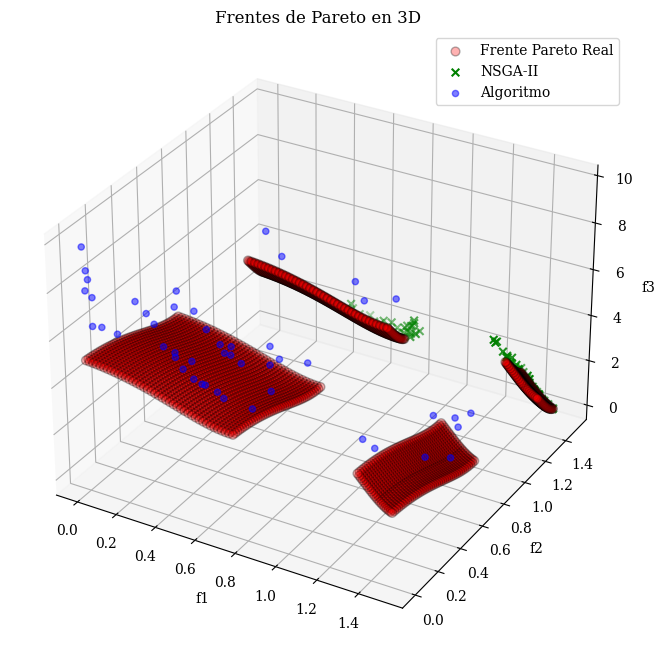

In [ ]:
### Inicializar el problema MW14 y obtener pareto de AGEMOEA
problem = get_problem("mw14")
algorithm = AGEMOEA(pop_size=100)
ref_point = np.array([1.5, 1.5, 7.0])
agemoea_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)


if agemoea_pareto is None: agemoea_pareto = minimize(problem, algorithm, ('n_gen', 100), verbose=False)

best_pareto, best_pareto_objetives, metrics_summary = multiple_experiments_with_metrics(problem, fitness_mw14, ref_point, num_experiments=10, F_mode=0)

####################
### Métricas ###
####################
hv, spr, spa = calculate_metrics(best_pareto_objetives, ref_point)
hv_obj, spr_obj, spa_obj = calculate_metrics(agemoea_pareto.F, ref_point)

data = {'Hipervolumen': [hv, hv_obj], 'Dispersión (SPR)': [spr, spr_obj], 'Espaciado (SPA)': [spa, spa_obj]}

df = pd.DataFrame(data, index=['Mejor Solución', 'AGEMOEA'])
print(f"\n {df}")

####################
##### Graficas #####
####################
plot_pareto_3d(problem, agemoea_pareto, best_pareto)
plot_pareto_with_pymoo()